In [126]:
!pip3 install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("emi_prediction_dataset.csv")
df.head(10)

C:\Users\sachi\AppData\Local\Temp\ipykernel_14324\2315008385.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emi_prediction_dataset.csv")


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
5,38.0,Male,Married,High School,38800.0,Government,5.0,Large Indian,Rented,13500.0,...,No,0.0,792.0,260800.0,55600.0,Vehicle EMI,1257000.0,53,Not_Eligible,500.0
6,58.0,Male,Single,High School,27100.0,Private,36.0,Large Indian,Own,0.0,...,No,0.0,741.0,68000.0,36200.0,Home Appliances EMI,280000.0,11,Not_Eligible,1950.0
7,58.0,Female,Married,Post Graduate,392044.0,Private,12.9,MNC,Family,0.0,...,Yes,9900.0,623.0,184600.0,61700.0,E-commerce Shopping EMI,153000.0,12,Not_Eligible,8260.0
8,58.0,Female,Married,Professional,47700.0,Private,36.0,Large Indian,Family,0.0,...,No,0.0,712.0,235600.0,81800.0,E-commerce Shopping EMI,106000.0,14,Not_Eligible,5500.0
9,32.0,female,Single,Post Graduate,129200.0,Private,1.9,MNC,Family,0.0,...,Yes,33100.0,681.0,963200.0,519100.0,E-commerce Shopping EMI,81000.0,3,Not_Eligible,9355.5


In [4]:
df.shape

(404800, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [12]:
df['emi_eligibility'].unique()

array(['Not_Eligible', 'Eligible', 'High_Risk'], dtype=object)

In [6]:
df.value_counts()

age   gender  marital_status  education      monthly_salary  employment_type  years_of_employment  company_type  house_type  monthly_rent  family_size  dependents  school_fees  college_fees  travel_expenses  groceries_utilities  other_monthly_expenses  existing_loans  current_emi_amount  credit_score  bank_balance  emergency_fund  emi_scenario             requested_amount  requested_tenure  emi_eligibility  max_monthly_emi
26.0  F       Married         Post Graduate  108052.0        Private          0.6                  Large Indian  Own         0.0           4            3           0.0          5700.0        11100.0          20200.0              14000.0                 Yes             22900.0             775.0         380000.0      156600.0        Home Appliances EMI      282000.0          9                 Not_Eligible     11625.60           1
              Single          Professional   109592.0        Private          0.5                  Small         Rented      17200.0       1 

In [7]:
df[['age','monthly_salary','bank_balance','emergency_fund','requested_amount','requested_tenure']].dtypes

age                  object
monthly_salary       object
bank_balance         object
emergency_fund      float64
requested_amount    float64
requested_tenure      int64
dtype: object

In [8]:
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [9]:
df[['monthly_salary','bank_balance']].dtypes

monthly_salary    float64
bank_balance      float64
dtype: object

In [11]:
df.duplicated().sum()

np.int64(0)

In [135]:
df.isnull().sum()

age                          3
gender                       0
marital_status               0
education                 2404
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              4392
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [136]:
null_percentage = (df.isnull().sum()/len(df))*100
null_percentage>30

age                       False
gender                    False
marital_status            False
education                 False
monthly_salary            False
employment_type           False
years_of_employment       False
company_type              False
house_type                False
monthly_rent              False
family_size               False
dependents                False
school_fees               False
college_fees              False
travel_expenses           False
groceries_utilities       False
other_monthly_expenses    False
existing_loans            False
current_emi_amount        False
credit_score              False
bank_balance              False
emergency_fund            False
emi_scenario              False
requested_amount          False
requested_tenure          False
emi_eligibility           False
max_monthly_emi           False
dtype: bool

In [137]:
df.columns[null_percentage>0]


Index(['age', 'education', 'monthly_salary', 'monthly_rent', 'credit_score',
       'bank_balance', 'emergency_fund'],
      dtype='object')

In [138]:
df['education'].fillna(df['education'].mode().iloc[0], inplace = True)
df[['monthly_salary', 'monthly_rent', 'credit_score',
       'bank_balance', 'emergency_fund']] = df[['monthly_salary', 'monthly_rent', 'credit_score',
       'bank_balance', 'emergency_fund']].fillna(df[['monthly_salary', 'monthly_rent', 'credit_score',
       'bank_balance', 'emergency_fund']].median())


C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\1615608098.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode().iloc[0], inplace = True)


In [139]:
df.isnull().sum()

age                       3
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [140]:
numeric_features = df.select_dtypes(include = ['int64','float64']).columns
numeric_features

Index(['age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
       'family_size', 'dependents', 'school_fees', 'college_fees',
       'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
       'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund',
       'requested_amount', 'requested_tenure', 'max_monthly_emi'],
      dtype='object')

C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\3050324110.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\3050324110.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\3050324110.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\3050324110.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\3050324110.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small

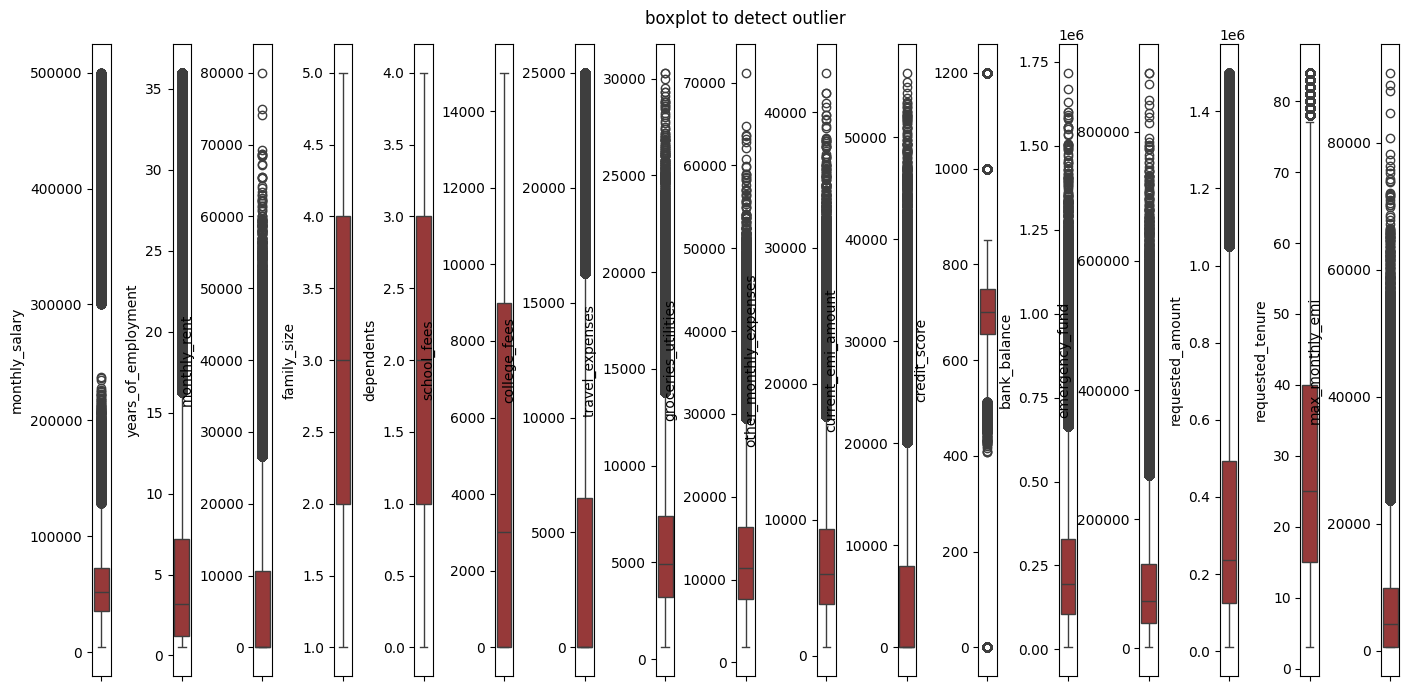

In [ ]:
numberic_features = ['monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size',
       'dependents', 'school_fees', 'college_fees', 'travel_expenses',
       'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount',
       'requested_tenure', 'max_monthly_emi']

plt.figure(figsize = (15,7))
plt.suptitle("boxplot to detect outlier")
for i in range(0,len(numberic_features)):
    plt.subplot(1,18,i+1)
    sns.boxplot(y = df[numberic_features[i]], color = 'brown')
    plt.tight_layout()


In [ ]:
for col in numberic_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    inbound = Q1-1.5*IQR
    outbound = Q3+1.5*IQR

    df[col] = np.where(df[col]<inbound,inbound,df[col])
    df[col] = np.where(df[col]>outbound,outbound,df[col])

C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\1673004242.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\1673004242.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\1673004242.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\1673004242.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\sachi\AppData\Local\Temp\ipykernel_16588\1673004242.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small

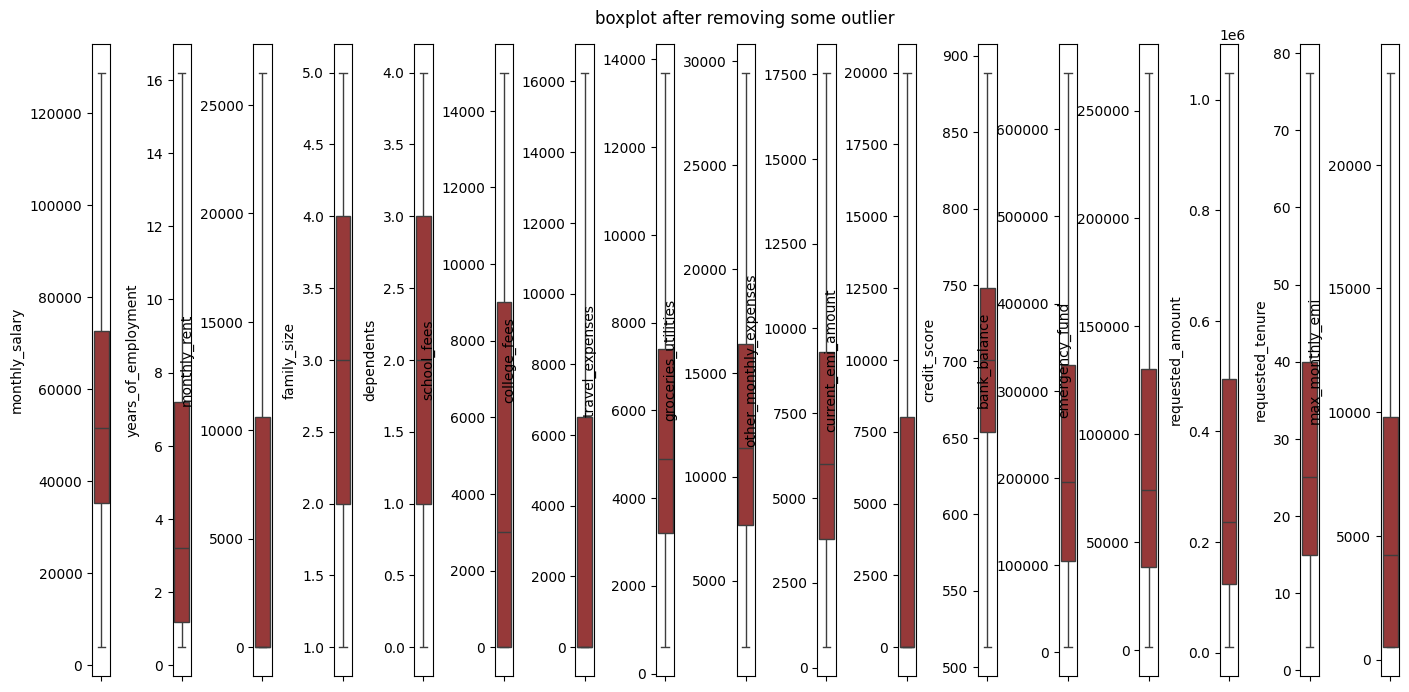

In [ ]:
numberic_features = ['monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size',
       'dependents', 'school_fees', 'college_fees', 'travel_expenses',
       'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount',
       'requested_tenure', 'max_monthly_emi']

plt.figure(figsize = (15,7))
plt.suptitle("boxplot after removing some outlier")
for i in range(0,len(numberic_features)):
    plt.subplot(1,18,i+1)
    sns.boxplot(y = df[numberic_features[i]], color = 'brown')
    plt.tight_layout()


In [144]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [145]:
print(df['gender'].unique())
print(df['marital_status'].unique())
print(df['education'].unique())
print(df['employment_type'].unique())
print(df['emi_eligibility'].unique())
print(df['existing_loans'].unique())
print(df['company_type'].unique())
print(df['house_type'].unique())



['Female' 'Male' 'female' 'male' 'M' 'MALE' 'F' 'FEMALE']
['Married' 'Single']
['Professional' 'Graduate' 'High School' 'Post Graduate']
['Private' 'Government' 'Self-employed']
['Not_Eligible' 'Eligible' 'High_Risk']
['Yes' 'No']
['Mid-size' 'MNC' 'Startup' 'Large Indian' 'Small']
['Rented' 'Family' 'Own']


In [146]:
df['gender'] = df['gender'].replace({
    'F':'Female',
    'M':'Male',
    'MALE':'Male',
    'FEMALE':'Female',
    'female':'Female',
    'male':'Male'

})
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [147]:
df.to_csv("clean_emi_data.csv", index = False)